In [188]:
import numpy as np
import matplotlib.pyplot as plt
import math
import timeit

In [217]:
class Network(object):
    def __init__(self, num_nodes):
        self.adj = {i: set() for i in range(num_nodes)}

    def add_edge(self, i, j):
        self.adj[i].add(j)
        self.adj[j].add(i)

    def neighbors(self, i):
        return self.adj[i]

    def edge_list(self):
        return [(i, j) for i in self.adj for j in self.adj[i] if i < j]

class Bernoulli_Network(Network):
    def __init__(self, num_nodes, probability):
        self.adj = {i: set() for i in range(num_nodes)}

        for i in range(num_nodes):
            for j in range(i+1, num_nodes):
                if np.random.binomial(1, probability):   
                    self.add_edge(i, j)

# Assumed sparse network to be efficient
class Two_Step_Bernoulli_Network(Network):
    def __init__(self, num_nodes, probability):
        self.adj = {i: set() for i in range(num_nodes)}

        num_edges = math.comb(num_nodes, 2)
        m = np.random.binomial(num_edges, probability)

        for _ in range(m):
            i, j = np.random.randint(0, num_nodes), np.random.randint(0, num_nodes)
            while i == j or j in self.adj[i]:
                j = np.random.randint(0, num_nodes)
            self.add_edge(i, j)
            



Theoretical Mean: 495.0 Actual Mean: 498.75
Theoretical Variance: 445.5 Actual Variance: 419.4075


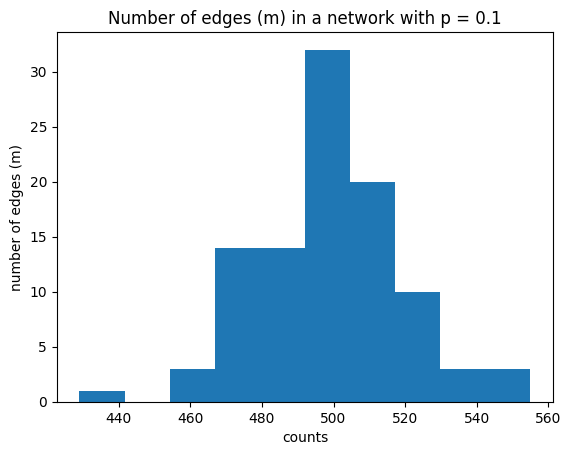

Theoretical Mean: 1485.0 Actual Mean: 1483.28
Theoretical Variance: 1039.5 Actual Variance: 1143.9016000000001


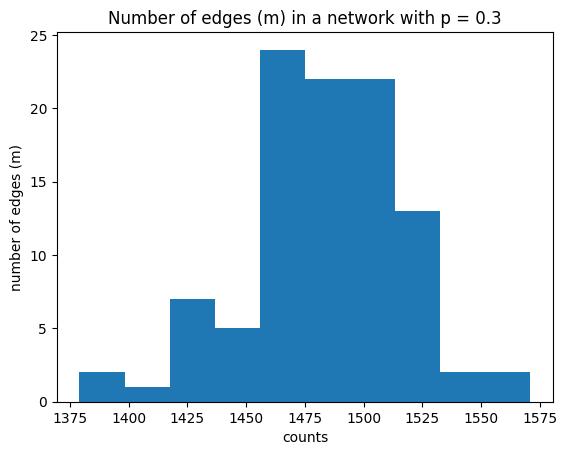

Theoretical Mean: 2475.0 Actual Mean: 2467.2
Theoretical Variance: 1237.5 Actual Variance: 1408.8199999999997


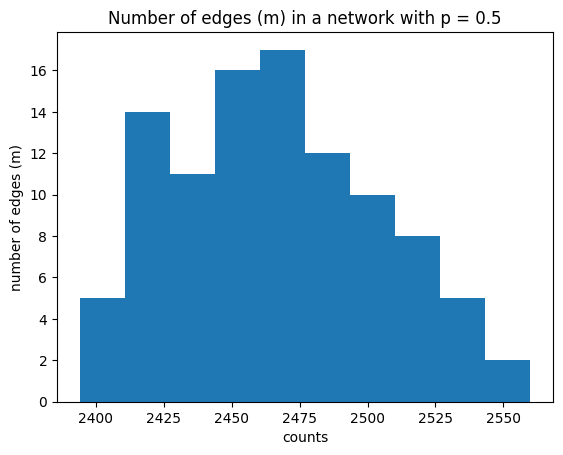

Theoretical Mean: 4455.0 Actual Mean: 4456.82
Theoretical Variance: 445.4999999999999 Actual Variance: 660.3475999999999


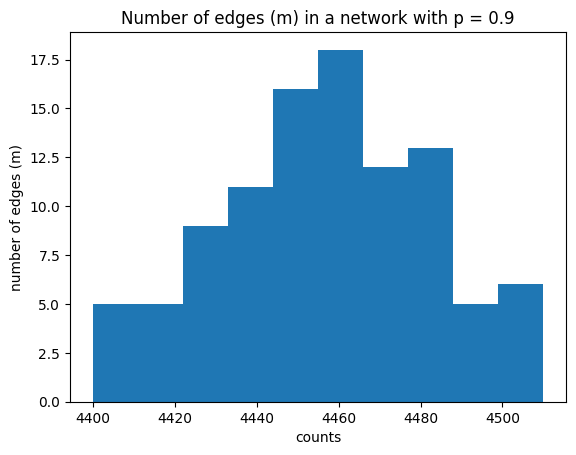

In [272]:
n = 100
p_list = [0.1, 0.3, 0.5, 0.9]
sample_size = 100

for p in p_list:
    m_list = []
    for i in range(sample_size):
        bernoulli = Bernoulli_Network(n, p)
        m = len(bernoulli.edge_list())
        m_list.append(m)
    counts, bins, hist = plt.hist(m_list, bins=10)
    print("Theoretical Mean:", math.comb(n, 2)*p, "Actual Mean:", np.mean(m_list))
    print("Theoretical Variance:", math.comb(n, 2)*p*(1-p), "Actual Variance:", np.var(m_list))
    plt.title(f"Number of edges (m) in a network with p = {p}")
    plt.xlabel("counts")
    plt.ylabel("number of edges (m)")
    plt.show()

In [220]:
n_list = 2**np.array(range(6, 11))
p = lambda x: 10 / (x - 1)
timer_number = 50

bernoulli_time_list = []
two_step_bernoulli_time_list = []

for n in n_list:
    bernoulli = timeit.timeit(lambda: Bernoulli_Network(n, p(n)), number=timer_number)
    two_step_bernoulli = timeit.timeit(lambda: Two_Step_Bernoulli_Network(n, p(n)), number=timer_number)

    bernoulli_time_list.append(bernoulli)
    two_step_bernoulli_time_list.append(two_step_bernoulli)

    print(f"n = {n}")
    print(f"Bernoulli: {bernoulli}")
    print(f"Two-step Bernoulli: {two_step_bernoulli}")
    print("")


n = 64
Bernoulli: 0.11176070000146865
Two-step Bernoulli: 0.13934810000137077

n = 128
Bernoulli: 0.3547470000012254
Two-step Bernoulli: 0.22232100000110222

n = 256
Bernoulli: 1.4584673000026669
Two-step Bernoulli: 0.38389030000325874

n = 512
Bernoulli: 5.585847299997113
Two-step Bernoulli: 0.7700155000020459

n = 1024
Bernoulli: 26.49620120000327
Two-step Bernoulli: 2.0520054000007804



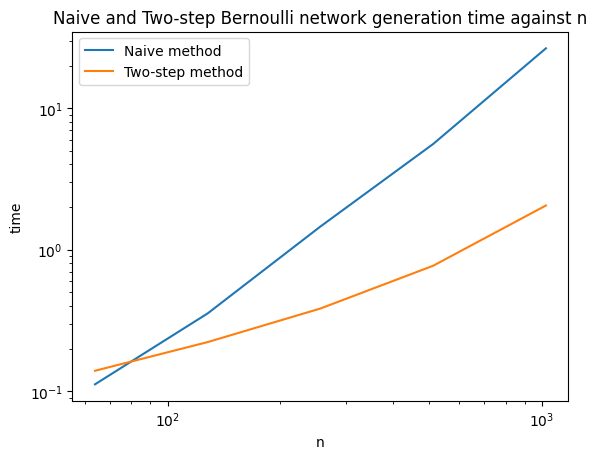

In [225]:
plt.loglog(n_list, bernoulli_time_list, label="Naive method")
plt.loglog(n_list, two_step_bernoulli_time_list, label="Two-step method")
plt.legend()
plt.title("Naive and Two-step Bernoulli network generation time against n")
plt.xlabel("n")
plt.ylabel("time")
plt.show()

In [286]:
n = 4096
p_list =  np.linspace(0, 0.001, 40)
sample_size = 40
size_list = []

def dfs(curr_node, network: Network, reachable_nodes):
    adj_nodes = network.adj[curr_node]

    for node in adj_nodes:
        if node not in reachable_nodes:
            reachable_nodes.add(node)
            dfs(node, network, reachable_nodes)

    return reachable_nodes

def num_reachable_node(node, network: Network):
    return len(dfs(node, network, set([node]))) - 1
    
for p in p_list:
    total = 0
    for _ in range(sample_size):
        network = Two_Step_Bernoulli_Network(n, p)
        total += num_reachable_node(1, network)
    size_list.append(total / sample_size)

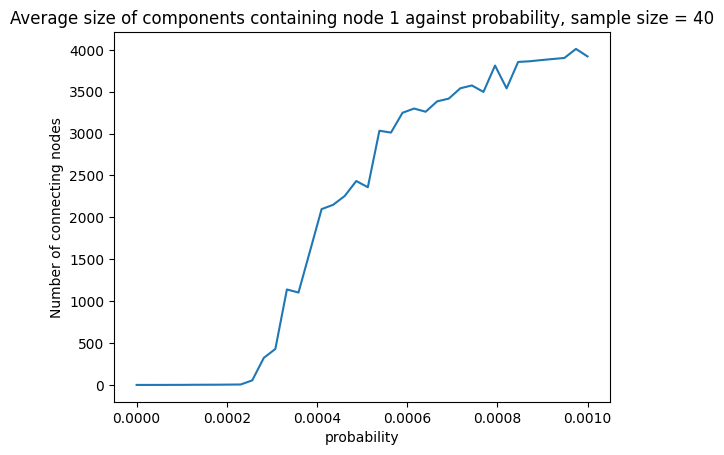

In [288]:
plt.plot(p_list, size_list)
plt.title(f"Average size of components containing node 1 against probability, sample size = {sample_size}")
plt.xlabel("probability")
plt.ylabel("Number of connecting nodes")
plt.show()

In [289]:
n = 4096
p_list =  np.linspace(0, 0.001, 20)
sample_size = 100
size_list = []

def dfs(curr_node, network: Network, reachable_nodes):
    adj_nodes = network.adj[curr_node]

    for node in adj_nodes:
        if node not in reachable_nodes:
            reachable_nodes.add(node)
            dfs(node, network, reachable_nodes)

    return reachable_nodes

def num_reachable_node(node, network: Network):
    return len(dfs(node, network, set([node]))) - 1
    
for p in p_list:
    total = 0
    for _ in range(sample_size):
        network = Two_Step_Bernoulli_Network(n, p)
        total += num_reachable_node(1, network)
    size_list.append(total / sample_size)

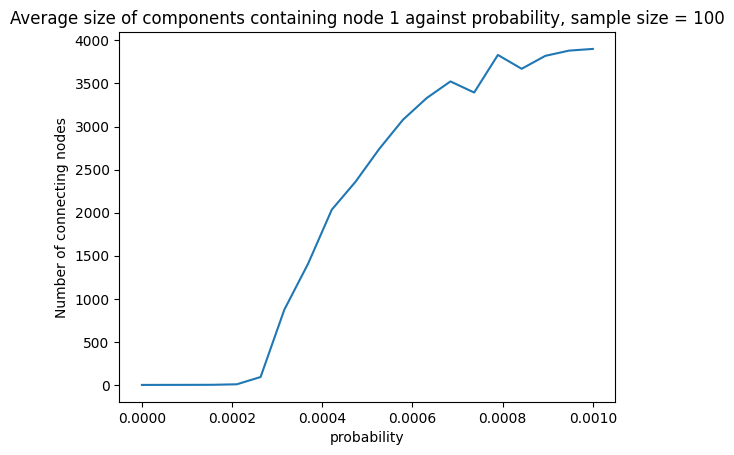

In [290]:
plt.plot(p_list, size_list)
plt.title(f"Average size of components containing node 1 against probability, sample size = {sample_size}")
plt.xlabel("probability")
plt.ylabel("Number of connecting nodes")
plt.show()

In [293]:
n = 4096
p_list =  np.linspace(0, 0.001, 200)
size_list = []

for p in p_list:
    network = Two_Step_Bernoulli_Network(n, p)
    size_list.append(num_reachable_node(1, network))

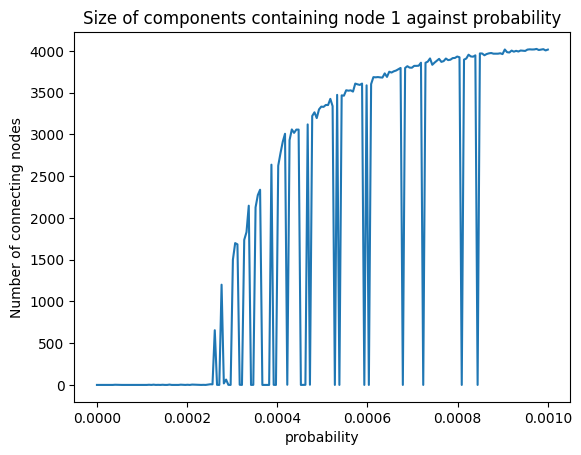

In [294]:
plt.plot(p_list, size_list)
plt.title(f"Size of components containing node 1 against probability")
plt.xlabel("probability")
plt.ylabel("Number of connecting nodes")
plt.show()